## Loading data

In [3]:
import pandas as pd
df = pd.read_csv("neg_train.txt", on_bad_lines='skip')
df1=pd.read_csv("pos_train.txt", quoting=3,on_bad_lines='skip')


In [4]:
df['sentiment']=0
df1['sentiment']=1
df.columns=['text','sentiment']
df1.columns=['text','sentiment']

In [5]:
result = pd.concat([df, df1], axis=0)
df=result.sample(frac=1).reset_index(drop=True)

## Tokenizer

In [6]:
from tensorflow.keras.preprocessing.text import Tokenizer

# tokenizer = Tokenizer(num_words=5787, oov_token='<UNK>')
# tokenizer.fit_on_texts(tweets)
tokenizer=Tokenizer()
tokenizer.fit_on_texts(df['text'])
len(tokenizer.word_index)

5873

## Dsitribution of reviews' length

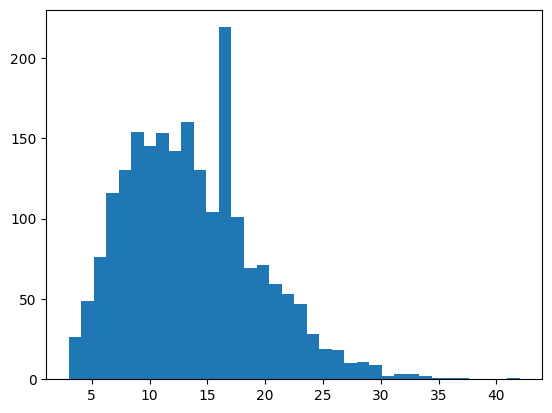

In [8]:
import matplotlib.pyplot as plt

lengths=[len(t.split(' ')) for t in df['text']]
plt.hist(lengths,bins=len(set(lengths)))
plt.show()

In [9]:
max(lengths)

42

In [10]:
maxlen=237

In [11]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

def get_sequences(tokenizer,tweets):
    sequences=tokenizer.texts_to_sequences(tweets)
    padded_sequences=pad_sequences(sequences,maxlen=maxlen,padding='post',truncating='post')
    return padded_sequences

In [12]:
padded_train_seq=get_sequences(tokenizer,df['text'])

In [13]:
padded_train_seq[0]

array([ 56,  68, 941,   1, 399,  53, 263,  64,  20,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [15]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(padded_train_seq,df['sentiment'],test_size=0.2)

## Model building

In [21]:
import tensorflow as tf

model=tf.keras.models.Sequential([
    tf.keras.layers.Embedding(5874,100,input_length=maxlen),
     tf.keras.layers.Dropout(0.9),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(200,return_sequences=True)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20)),
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(2,activation='softmax')
])

model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

## Model training

In [22]:
model.fit(x_train,
          y_train,
          validation_data=(x_test,y_test),
          epochs=10,
          callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',patience=2)]
)

Epoch 1/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 26s 416ms/step - accuracy: 0.5041 - loss: 0.6952 - val_accuracy: 0.4681 - val_loss: 0.6941
Epoch 2/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 22s 423ms/step - accuracy: 0.4866 - loss: 0.6947 - val_accuracy: 0.5981 - val_loss: 0.6883
Epoch 3/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 27s 503ms/step - accuracy: 0.5780 - loss: 0.6764 - val_accuracy: 0.6785 - val_loss: 0.6424
Epoch 4/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 24s 458ms/step - accuracy: 0.6771 - loss: 0.6123 - val_accuracy: 0.7069 - val_loss: 0.5802
Epoch 5/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 20s 385ms/step - accuracy: 0.7459 - loss: 0.5074 - val_accuracy: 0.7329 - val_loss: 0.5629
Epoch 6/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 20s 382ms/step - accuracy: 0.8261 - loss: 0.4184 - val_accuracy: 0.7092 - val_loss: 0.5832
Epoch 7/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 20s 379ms/step - accuracy: 0.8461 - loss: 0.3797 - val_accuracy: 0.7447 - val_loss: 0.5301
Epoch 8/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 22s 416ms/step - accuracy: 0.8637 - loss: 0.3283 - val_accu

In [23]:
model.save('emotionDetection.keras')

In [24]:
text=""""यह एक ऐसी मिठाई है जो कई सदियों से चली आ रही है। यह एक हल्का, तकियादार साइट्रस जिलेटिन है जिसमें मेवे होते हैं - इस मामले में फिल्बर्ट्स। और इसे छोटे-छोटे चौकोर टुकड़ों में काटा जाता है और फिर उदारतापूर्वक पाउडर चीनी के साथ लेपित किया जाता है। और यह स्वर्ग का एक छोटा सा कौर है। बहुत चबाने वाला नहीं, और बहुत स्वादिष्ट। मैं इस स्वादिष्ट व्यंजन की अत्यधिक अनुशंसा करता हूँ। यदि आप सी.एस. लुईस की ""द लायन, द विच, एंड द वार्डरोब"" की कहानी से परिचित हैं - तो यह वह व्यंजन है जो एडमंड को अपने भाई और बहनों को चुड़ैल को बेचने के लिए बहकाता है।"
"""
seq=get_sequences(tokenizer,[text]);

In [25]:
seq

array([[  22,   23,  409,    6,   97,   91,    5, 1494,  107,   26,    7,
          22,   23, 3805,    6,  957,  149,   19,   15,  309,    2,    9,
         298, 2189, 2189,    2,   84,    6,    9,   81, 3363,    1,   34,
          33,   84,    7,    9,   22, 3170,    8,   23, 3154, 1322,    7,
          40,  411,   13,    9,   40,   42,   15,    3,  924,  134, 5187,
         197,  174, 5473, 1649,    3, 1018, 1018, 1396, 1018,    3,  398,
           5,   19,   27,   22,   30,    6,   97,    4,   28,    9,    4,
           4, 1303,    1,   16,    7,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0, 

In [26]:
seq.shape

(1, 237)

In [27]:
model.predict(seq)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 438ms/step


array([[0.14513916, 0.8548609 ]], dtype=float32)